# Academic Achievement 
Machine Learning, 
Model Analysis and Feature Analysis, 
and Data Visualization
---------------------------------------------------------------------------------------------------------------------------------
# Project Purpose
---------------------------------------------------------------------------------------------------------------------------------
The purpose of this project is to predict academic achievement in secondary education(high school) of two Portuguese schools. This project explores the external factors that may support or hinder academic achievement.

---------------------------------------------------------------------------------------------------------------------------------
# Student Peformance
---------------------------------------------------------------------------------------------------------------------------------

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).(UCI, December 2024.)
_________________________________________________________________________________________________________________________________
# Methodology

Machine Learning:using machine learning models to analyze historical data. This allows data professionals to predict or make decisions without knowing the final outcome. Academic Achievement (project) will use the logistic regression and decision tree models. 

Model Analysis:Logistic regression-using features, it applies a linear relationship between features
(independent variables) and targets.

Decision Tree: Root Nodes: entire dataset and splits based on feature significance. Internal Nodes: decision based on features and decision splits the dataset into smaller subsets. Branches: connect nodes and showcase the outcomes. Leaf nodes: terminal node to the final prediction.

Feature Analysis: features are independent variables used in the model.

Data Visualization: creating graphs and other visualizations to show the logistic and decision tree models/features.
_________________________________________________________________________________________________________________________________
# Prediction
_________________________________________________________________________________________________________________________________
The external factors will support the academic achievement of secondary education.

# Dataset Variables

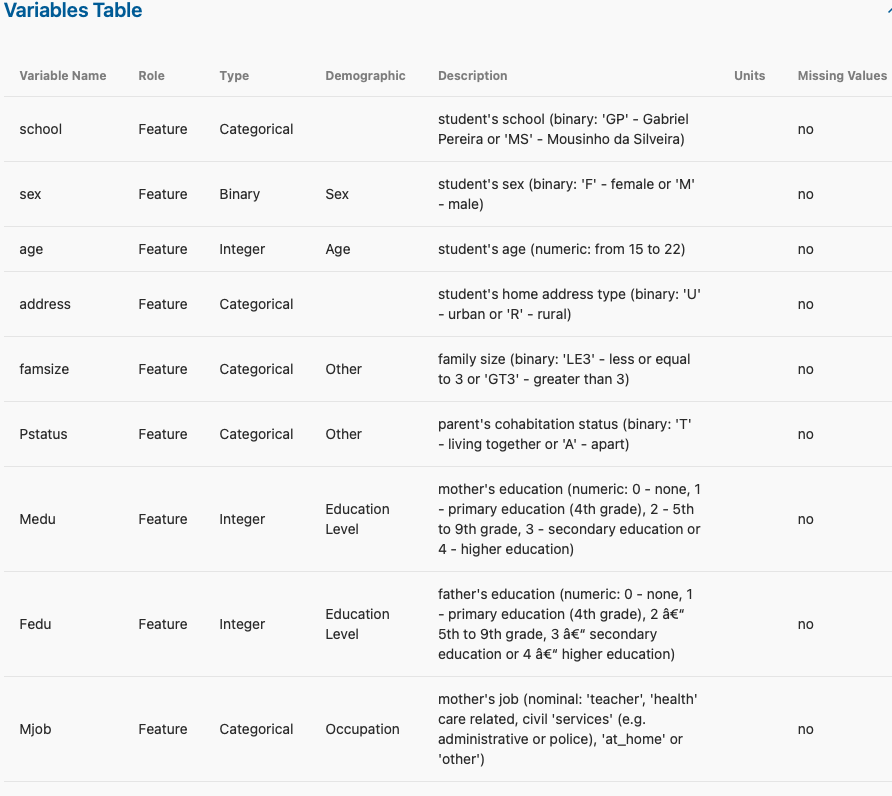
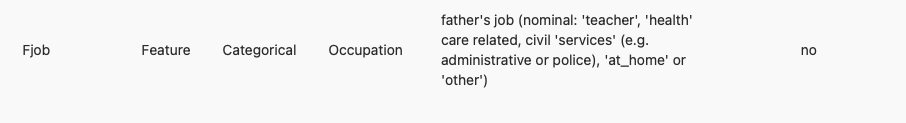
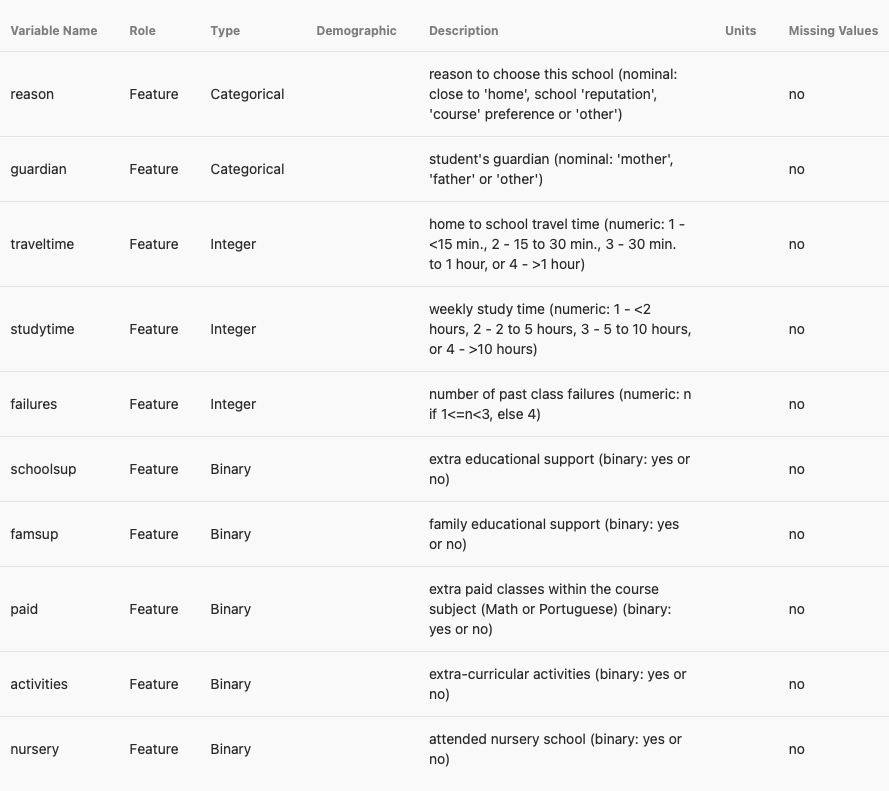
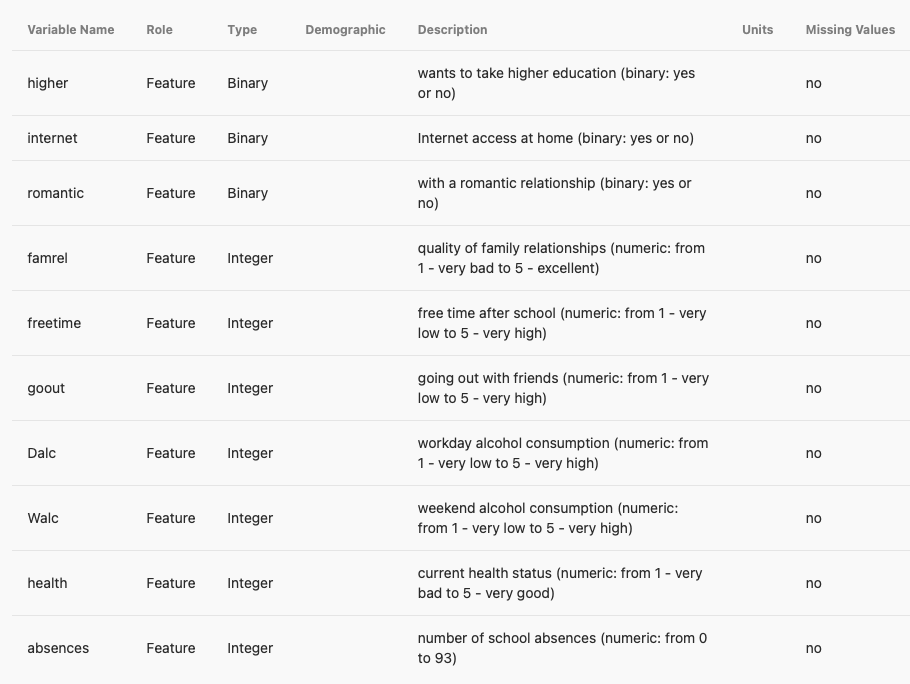

In [162]:
!pip install pydotplus


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [163]:
#Import libraries

import pandas as pd
import numpy as np

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

from pathlib import Path
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MinMaxScaler,StandardScaler
%matplotlib inline

In [164]:
# Load the dataset
data = pd.read_csv('Resources/student-mat.csv', delimiter=';')

In [165]:
# Remove unnecessary columns
columns_to_remove = ["G1", "G2", "Walc", "address", "famrel", "Dalc", "guardian", "famsize"]
data.drop(columns=[col for col in columns_to_remove if col in data.columns], errors='ignore', inplace=True)

In [166]:
# Rename columns
data.rename(columns={"G3": "final_grade", "studytime": "Study_Time_Hours", "Fedu": "Father_Edu", "Medu": "Mother_Edu", "Pstatus": "Parent_status"}, inplace=True)

In [167]:
# Convert 'yes'/'no' to 0's and 1's
binary_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in binary_columns:
    if col in data.columns:
        data[col] = data[col].map({'yes': 1, 'no': 0})

In [168]:
# Handle missing values: Fill with mean for 'absences'
if 'absences' in data.columns:
    data['absences'].fillna(data['absences'].mean(), inplace=True)

In [169]:
# Normalize numerical features (example: scale 'absences' between 0 and 1)
# scaler = MinMaxScaler()
# numerical_columns = ['absences', 'Study_Time_Hours', 'final_grade']
# for col in numerical_columns:
#     if col in data.columns:
#         data[col] = scaler.fit_transform(data[[col]])

In [170]:
# Show the first few rows of the cleaned data
data.head()

,school,sex,age,Parent_status,Mother_Edu,Father_Edu,Mjob,Fjob,reason,traveltime,...,activities,nursery,higher,internet,romantic,freetime,goout,health,absences,final_grade
0,GP,F,18,A,4,4,at_home,teacher,course,2,...,0,1,1,0,0,3,4,3,6,6
1,GP,F,17,T,1,1,at_home,other,course,1,...,0,0,1,1,0,3,3,3,4,6
2,GP,F,15,T,1,1,at_home,other,other,1,...,0,1,1,1,0,3,2,3,10,10
3,GP,F,15,T,4,2,health,services,home,1,...,1,1,1,1,1,2,2,5,2,15
4,GP,F,16,T,3,3,other,other,home,1,...,0,1,1,0,0,3,2,5,4,10


In [171]:
# Export the cleaned dataset
data.to_csv('cleaned_student_mat.csv', index=False)

# Convert categorical data to numeric 

In [172]:
#Convert categorical data to numeric with pd.get_dummies #Reference Module 21 Homework
numeric_data = pd.get_dummies(data,dtype=float)
numeric_data.head()

,age,Mother_Edu,Father_Edu,traveltime,Study_Time_Hours,failures,schoolsup,famsup,paid,activities,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,18,4,4,2,2,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,17,1,1,1,2,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,15,1,1,1,2,3,1,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,15,4,2,1,3,0,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,16,3,3,1,2,0,0,1,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Logistic Regression: External Factors Academic Impact

# Nursery

In [173]:
# Separate the Features (X) from the Target (y) #Reference Module 20, Day 2, Activity # 5

y = numeric_data["nursery"]
X = numeric_data.drop(columns="nursery")

# Nursery: Split our data into training and testing

In [174]:
#Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(296, 38)

# Nursery: Create a Logistic Regression Model

In [175]:
#Create the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

# Nursery: Fit (train) or model using the training data 

In [176]:
#Fit the train or model
classifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=1)

# Nursery: Score the model using the test data

In [177]:
#Scoring the model

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7972972972972973
Testing Data Score: 0.7878787878787878


# Nursery: Make predictions

In [178]:
#Make predictions

predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,1,1
7,1,1
8,1,1
9,1,1


# Nursery: Calculate the Accuracy Score

In [179]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7878787878787878

# Nursery: Confusion Matrix

In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 1, 19],
       [ 2, 77]])

# Nursery: Classification Report

In [181]:
# Nursery (0) = no to going to a nursery, Nursery (1) = yes to going to a nursery

from sklearn.metrics import classification_report
target_names = ["Nursery (0)", "Nursery (1)"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

 Nursery (0)       0.33      0.05      0.09        20
 Nursery (1)       0.80      0.97      0.88        79

    accuracy                           0.79        99
   macro avg       0.57      0.51      0.48        99
weighted avg       0.71      0.79      0.72        99



# Decision Tree:External Factors Academic Impact

# Nursery

In [182]:
# Define target vector
y = numeric_data["nursery"].values.reshape(-1, 1)
y[:5]

array([[1],
       [0],
       [1],
       [1],
       [1]])

In [183]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [184]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [185]:
# Fitting Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [186]:
# Scaling the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Nursery: Fitting the Decison Tree Model

In [187]:
#Nursery: Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [188]:
#Nursery: Fitting the model
model = model.fit(X_train_scaled, y_train)

# Nursery: Masking Predictions Using the Tree Model

In [189]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

# Nursery: Model Evaluation


In [190]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_data = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [191]:
# Displaying results
print("Confusion Matrix")
display(cm_data)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5,16
Actual 1,13,65


Accuracy Score : 0.7070707070707071
Classification Report
              precision    recall  f1-score   support

           0       0.28      0.24      0.26        21
           1       0.80      0.83      0.82        78

    accuracy                           0.71        99
   macro avg       0.54      0.54      0.54        99
weighted avg       0.69      0.71      0.70        99



# Nursery: Visualizing the Decision Tree

In [192]:
#Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [193]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with the defined hyperparameters
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=78)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Evaluate the classifier's accuracy on the test data
accuracy = clf.score(X_test, y_test)
accuracy


0.9473684210526315

# Nursery: Decision Tree Visualization

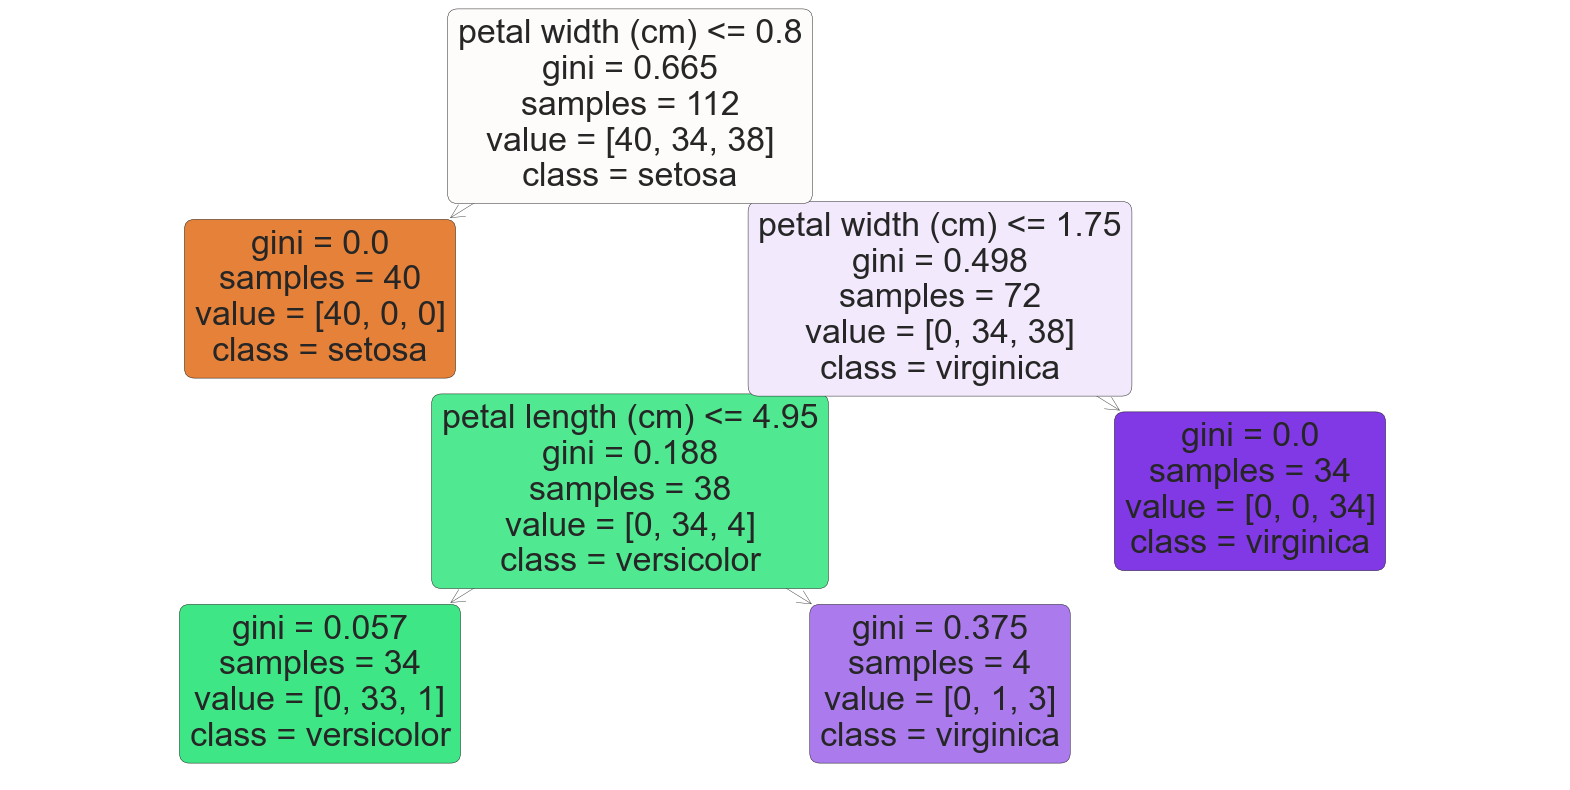

In [194]:
#Decision Tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

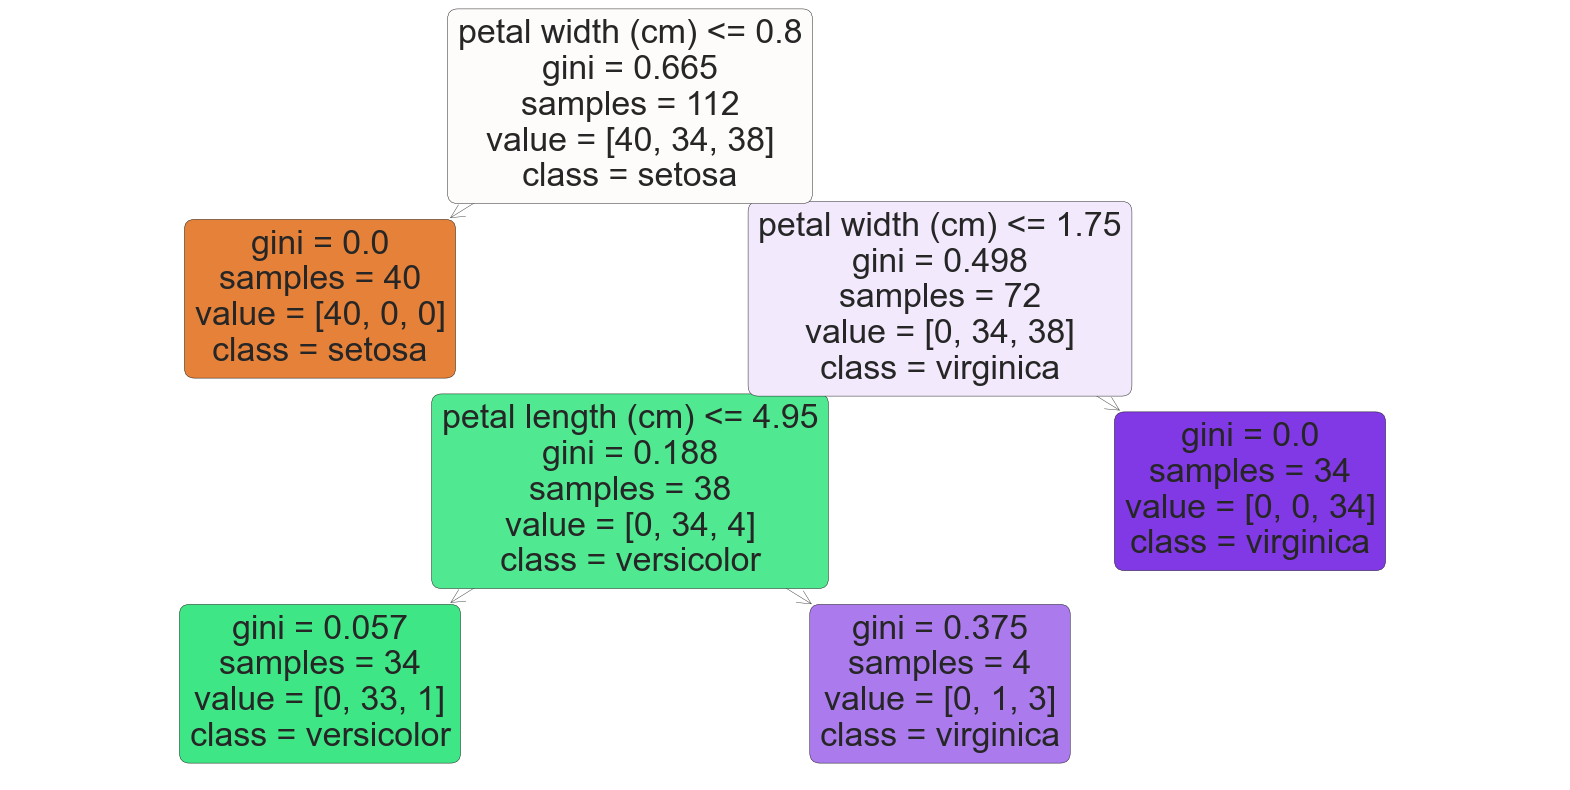

In [195]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

# Summary:


Reference: Nursery (0) = no to going to a nursery, Nursery (1) = yes to going to a nursery

Based on the Nursery Classification Report, the precision recall and f1 score are low for Nursery (0). Precision: 33% predictions were correct, Recall: 5% of actual cases in the class, F1-Score 9% due to precision and recall scores.This indicates that not going to nursery does not positively impact academic achievement. 

Nursery (1) scores: Precision: 80%, Recall: 97%, Nursery: 88%. Support 79 actual cases in the class. 

There was a 79% accuracy for all correct prediction across all clases.

Going to nursery has a positive impact on academic achievement for secondary education.


# Yellowbrick Library: Logistic Regression Feature Analysis

The Yellowbrick Library is ideal for model visualization and data visualization for maching learning.

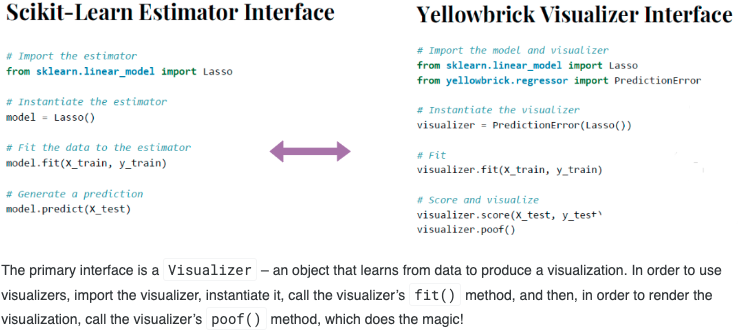

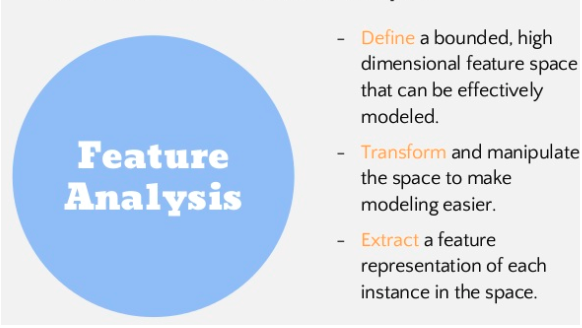

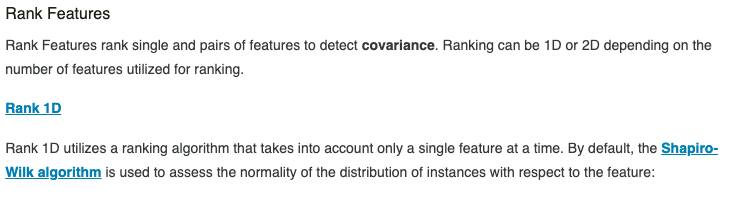

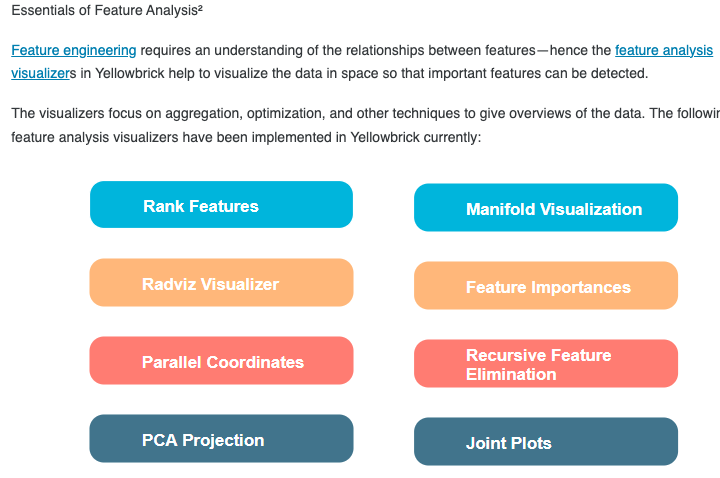

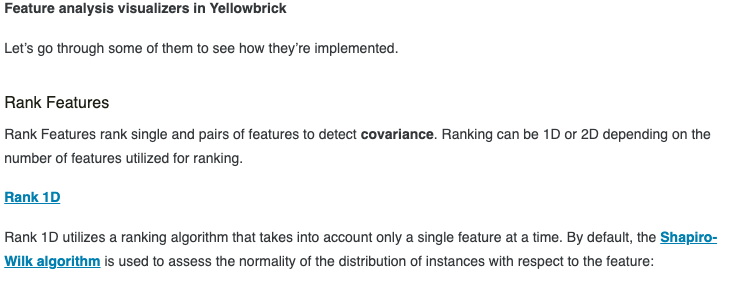

# Feature Ranking

Feature ranking determines, which features contribute most the predicts in the Machine Learning Model.
In this case, Decision Tree or Logistic Regression Models. Rank 1D is single feature importance ranking.
Rank 2D for paired feature importance ranking.

# Shapiro Ranking of 16 Features

Ranks individual features based on level of importance, from most to least important.

In [221]:
data.columns

Index(['school', 'sex', 'age', 'Parent_status', 'Mother_Edu', 'Father_Edu',
       'Mjob', 'Fjob', 'reason', 'traveltime', 'Study_Time_Hours', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'freetime', 'goout', 'health', 'absences',
       'final_grade'],
      dtype='object')

In [223]:
numeric_data.columns

Index(['age', 'Mother_Edu', 'Father_Edu', 'traveltime', 'Study_Time_Hours',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'freetime', 'goout', 'health',
       'absences', 'final_grade', 'school_GP', 'school_MS', 'sex_F', 'sex_M',
       'Parent_status_A', 'Parent_status_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation'],
      dtype='object')

In [196]:
# Rank Features. Assign the feature names for the columns. Then assign values to X and y.

feature_names = [
    'traveltime', 'Study_Time_Hours', 'failures', 'schoolsup',
       'famsup','paid','activities','nursery','higher','internet','romantic',
        'freetime','goout','health','absences','final_grade',
    ]

target_name = 'nursery'

X = numeric_data[feature_names]
y = numeric_data[target_name]

In [197]:
#Import the Yellowbrick Library for the Shapiro Ranking of 16 Features(Rank1D).

#from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
#visualizer = Rank1D(features=feature_names, algorithm='shapiro')

#visualizer.fit(X, y)                # Fit the data to the visualizer
#visualizer.transform(X)             # Transform the data
#visualizer.poof()                   # Draw/show/poof the data

Features ranked by Shapiro-Wilk scores:
             Feature     Score
15       final_grade  0.928730
12             goout  0.910020
11          freetime  0.906107
13            health  0.848650
1   Study_Time_Hours  0.834197
14          absences  0.666833
0         traveltime  0.659205
6         activities  0.636404
5               paid  0.633975
4             famsup  0.617791
10          romantic  0.595224
2           failures  0.507066
7            nursery  0.495223
9           internet  0.449819
3          schoolsup  0.394034
8             higher  0.225702


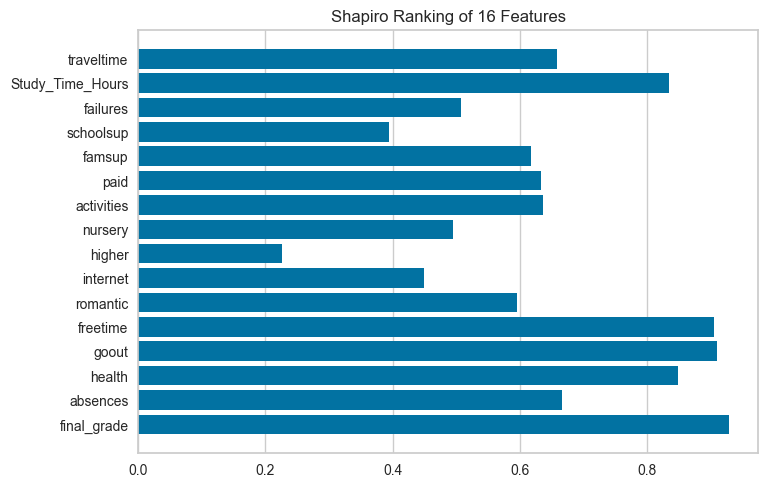

<Axes: title={'center': 'Shapiro Ranking of 16 Features'}>

In [198]:
from yellowbrick.features import Rank1D
import pandas as pd

# Instantiate the Rank1D visualizer with the Shapiro ranking algorithm
visualizer = Rank1D(features=feature_names, algorithm='shapiro')

# Fit and transform the data
visualizer.fit(X, y)
visualizer.transform(X)

# Access the ranks and scores
rank_scores = visualizer.ranks_

# Create a DataFrame to rank features
ranked_features = pd.DataFrame({
    "Feature": feature_names,
    "Score": rank_scores
})

# Sort features by score in descending order
ranked_features = ranked_features.sort_values(by="Score", ascending=False)

# Display ranked features
print("Features ranked by Shapiro-Wilk scores:")
print(ranked_features)

# Visualize the results (optional)
visualizer.show()



Features ranked by Shapiro-Wilk scores:
             Feature     Score
15       final_grade  0.928730
12             goout  0.910020
11          freetime  0.906107
13            health  0.848650
1   Study_Time_Hours  0.834197
14          absences  0.666833
0         traveltime  0.659205
6         activities  0.636404
5               paid  0.633975
4             famsup  0.617791
10          romantic  0.595224
2           failures  0.507066
7            nursery  0.495223
9           internet  0.449819
3          schoolsup  0.394034
8             higher  0.225702


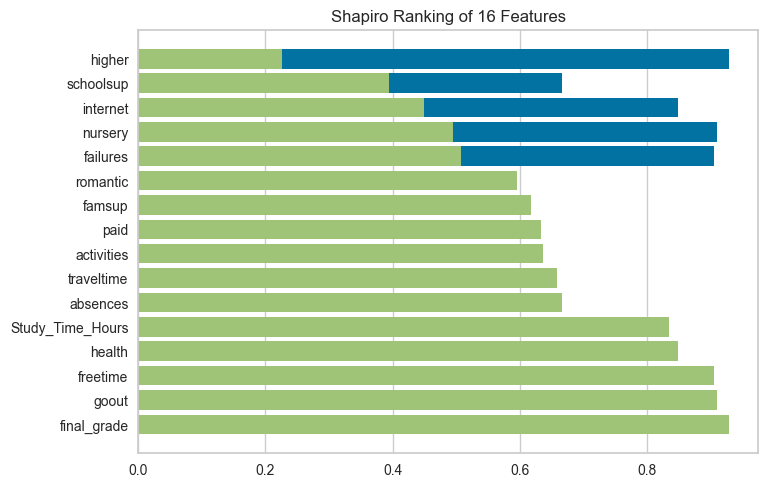

<Axes: title={'center': 'Shapiro Ranking of 16 Features'}>

In [199]:
#In the bar graph blue is non-academic and green is academic
from yellowbrick.features import Rank1D
import pandas as pd
import numpy as np

# Compute Shapiro-Wilk ranking using Yellowbrick
visualizer = Rank1D(features=feature_names, algorithm='shapiro')
visualizer.fit(X, y)
visualizer.transform(X)

# Access the ranks/scores
rank_scores = visualizer.ranks_

# Combine features and scores into a DataFrame
ranked_features = pd.DataFrame({
    "Feature": feature_names,
    "Score": rank_scores
})

# Sort features by scores in descending order
ranked_features = ranked_features.sort_values(by="Score", ascending=False)

# Reorder X and feature names based on the sorted ranking
sorted_feature_names = ranked_features["Feature"].values
sorted_X = pd.DataFrame(X, columns=feature_names)[sorted_feature_names].values

# Update the visualizer with the reordered data
visualizer = Rank1D(features=sorted_feature_names, algorithm='shapiro')
visualizer.fit(sorted_X, y)
visualizer.transform(sorted_X)

# Display ranked features
print("Features ranked by Shapiro-Wilk scores:")
print(ranked_features)

# Display the updated bar graph
visualizer.show()


In [226]:
# Rank Features. Assign the feature names for the columns. Then assign values to X and y.

numeric_data_feature_names = [
   'age', 'Mother_Edu', 'Father_Edu', 'traveltime', 'Study_Time_Hours',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'freetime', 'goout', 'health',
       'absences', 'final_grade', 'school_GP', 'school_MS', 'sex_F', 'sex_M',
       'Parent_status_A', 'Parent_status_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation'
    ]

target_name = 'nursery'

X = numeric_data[numeric_data_feature_names]
y = numeric_data[target_name]

Features ranked by Shapiro-Wilk scores:
              Feature     Score
18        final_grade  0.928730
0                 age  0.910590
15              goout  0.910020
14           freetime  0.906107
2          Father_Edu  0.875549
1          Mother_Edu  0.861027
16             health  0.848650
4    Study_Time_Hours  0.834197
17           absences  0.666833
3          traveltime  0.659205
9          activities  0.636404
21              sex_F  0.635493
22              sex_M  0.635488
8                paid  0.633975
32         Fjob_other  0.632963
7              famsup  0.617791
35      reason_course  0.610299
27         Mjob_other  0.606050
13           romantic  0.595224
33      Fjob_services  0.562655
36        reason_home  0.558977
38  reason_reputation  0.551298
28      Mjob_services  0.547293
5            failures  0.507066
10            nursery  0.495223
12           internet  0.449819
25       Mjob_at_home  0.425255
29       Mjob_teacher  0.421546
6           schoolsup  0.394034


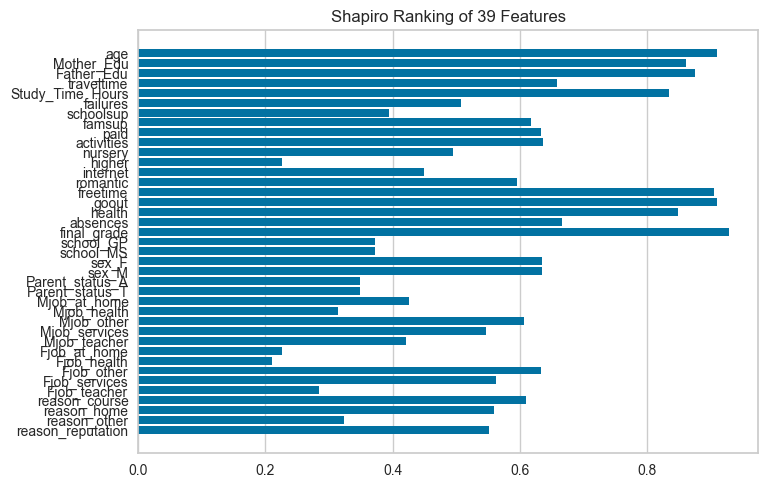

<Axes: title={'center': 'Shapiro Ranking of 39 Features'}>

In [228]:
from yellowbrick.features import Rank1D
import pandas as pd

# Instantiate the Rank1D visualizer with the Shapiro ranking algorithm
visualizer = Rank1D(features=numeric_data_feature_names, algorithm='shapiro')

# Fit and transform the data
visualizer.fit(X, y)
visualizer.transform(X)

# Access the ranks and scores
rank_scores = visualizer.ranks_

# Create a DataFrame to rank features
ranked_features = pd.DataFrame({
    "Feature": feature_names,
    "Score": rank_scores
})

# Sort features by score in descending order
ranked_features = ranked_features.sort_values(by="Score", ascending=False)

# Display ranked features
print("Features ranked by Shapiro-Wilk scores:")
print(ranked_features)

# Visualize the results (optional)
visualizer.show()

# Pearson Ranking of 16 Features

Ranks feature interactions by pairs. To understand the relationship between pairs and how those relationships rank.

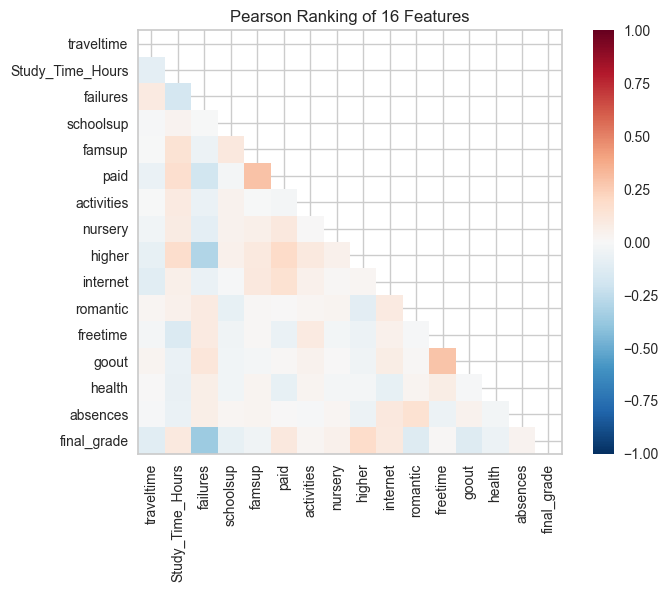

<Axes: title={'center': 'Pearson Ranking of 16 Features'}>

In [200]:
#Import the Yellowbrick Library for the Pearson Ranking of 16 Features(Rank2D). Paired feature ranking.

from yellowbrick.features import Rank2D 

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=feature_names, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

# Covariance Ranking of Features

Covariance: Measures the relationship between two features. Positive covariance, the features tend to increase together.Negative covariance one increases while the other decreases. Covariance values close to zero indicate that the features are not linearly related.

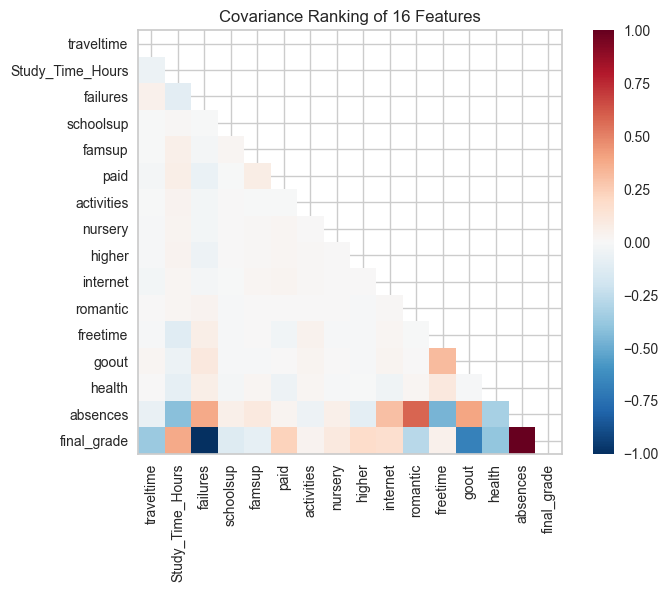

<Axes: title={'center': 'Covariance Ranking of 16 Features'}>

In [201]:
#Import the Yellowbrick Library for the Covariance Ranking of 16 Features(Rank2D).

from yellowbrick.features import Rank2D 

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=feature_names, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()

# Gaussian NB Classification Report

Gaussian classification report generally refers to a classification evaluation report that is based on a Gaussian (normal) distribution assumption for the model's output, or it can be related to Gaussian Naive Bayes (a type of probabilistic classifier based on Bayes' theorem and the assumption that features follow a Gaussian distribution).

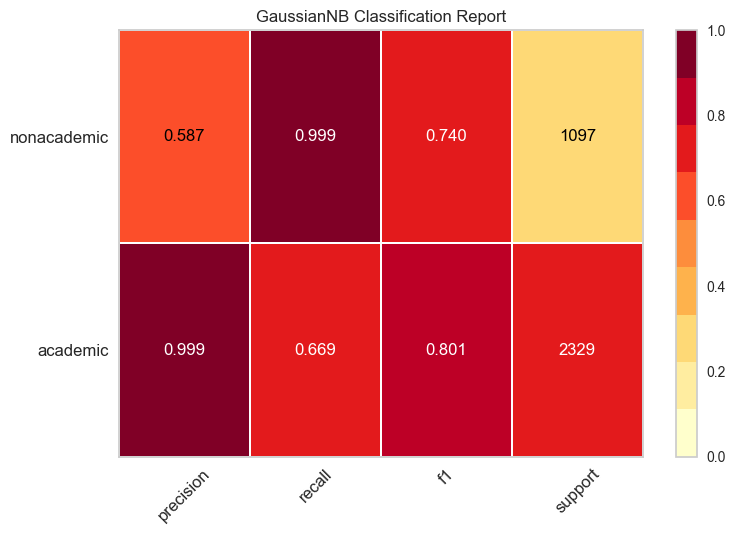

<Axes: title={'center': 'GaussianNB Classification Report'}>

In [202]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X, y = load_occupancy()

# Specify the target classes
classes = ["academic", "nonacademic"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the classification model and visualizer
model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

# Logistic Regression Classfication Report

A Logistic Regression Classification Report is a summary of the model's performance metrics after it has been trained and tested on a dataset. How well Logistic Regression model classifies the data into different categories (or classes) based on its predictions. 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


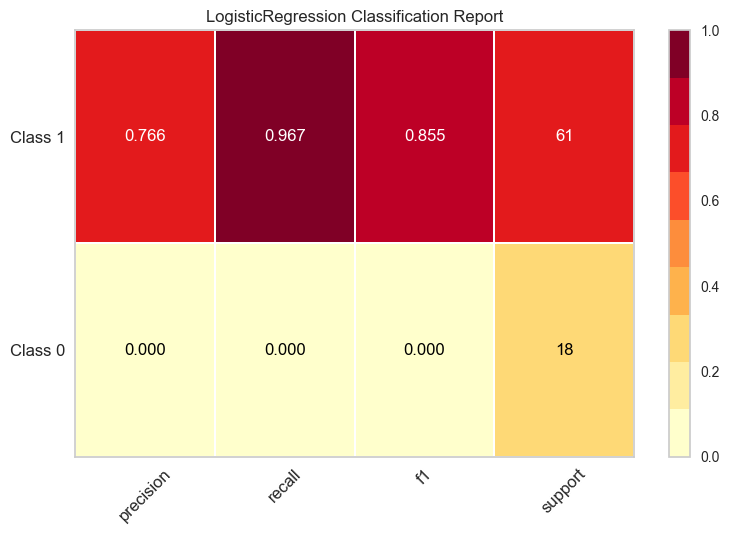

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [215]:
#Logistic Regression Classfication Report

import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Instantiate the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Instantiate the ClassificationReport visualizer
visualizer = ClassificationReport(model, classes=["Class 0", "Class 1"], support=True)  # Class 1 is nonacademic, Class 0 is academic

# Ensure X_train and X_test have the correct number of features
assert X_train.shape[1] == X_test.shape[1] == model.n_features_in_

# Fit the visualizer with training data
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Show the plot
visualizer.show()


# Decision Tree Classification Report

A Decision Tree Classification Report refers to the evaluation metrics generated after training a Decision Tree classifier on a dataset, and then using it to predict the target variable. 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


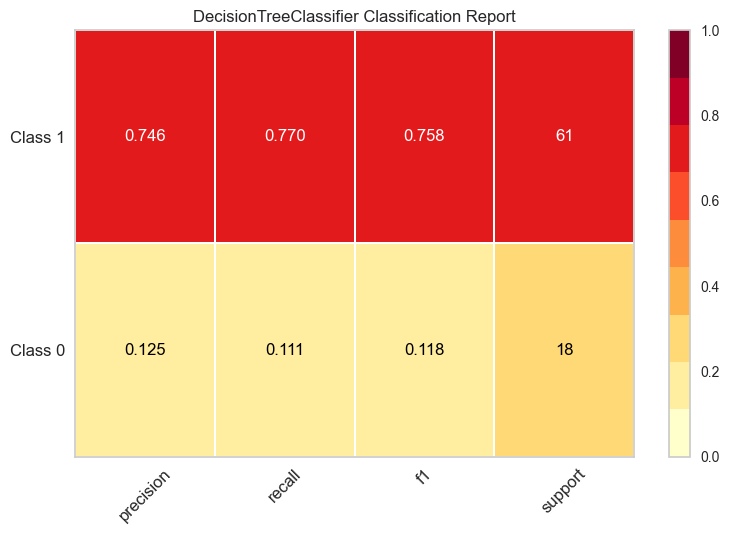

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [204]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport
from sklearn.tree import DecisionTreeClassifier

# Example: Ensure the model is trained on the same number of features as X_train
# Assuming X_train has the correct shape (e.g., 38 features)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Instantiate the ClassificationReport visualizer
visualizer = ClassificationReport(model, classes=["Class 0", "Class 1"], support=True) #Class 1 is nonacademic, Class 0 is academic

# Ensure X_train and X_test have the correct number of features
assert X_train.shape[1] == X_test.shape[1] == model.n_features_in_

# Fit the visualizer with training data
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Show the plot
visualizer.show()


# Parallel Coordinates

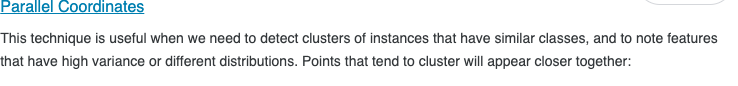

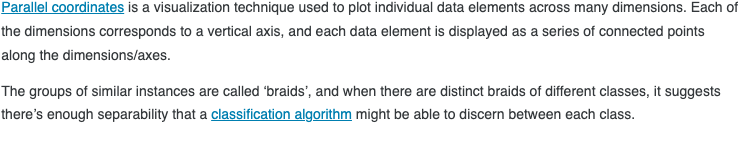

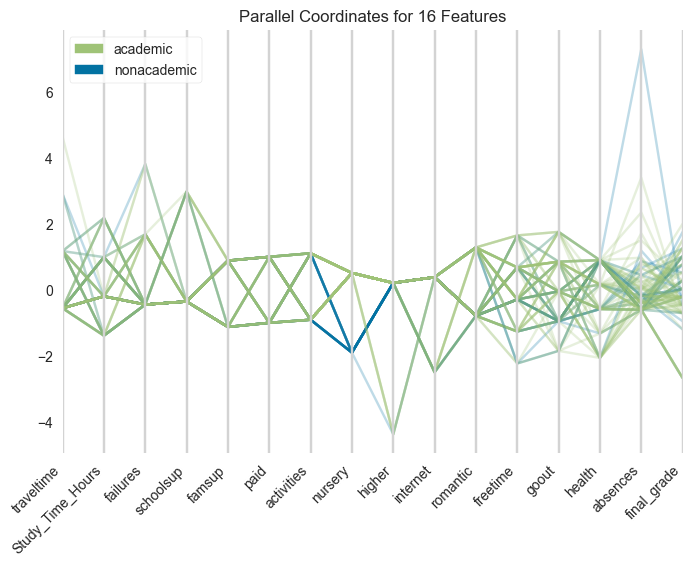

<Axes: title={'center': 'Parallel Coordinates for 16 Features'}>

In [230]:
# Parallel Coordinates for 16 columns

from yellowbrick.features import ParallelCoordinates
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Select a handful of relevant columns and drop nulls.
np.random.seed()
cols = [
    'traveltime', 'Study_Time_Hours', 'failures', 'schoolsup',
       'famsup','paid','activities','nursery','higher','internet','romantic',
        'freetime','goout','health','absences','final_grade',
    ]
X_sample = X.sample(100).loc[:, cols].dropna()
y_sample = y.iloc[X_sample.index.values].reset_index(drop=True)

# Normalize all of the fields.
trans = StandardScaler()
trans.fit(X_sample)
X_sample = pd.DataFrame(trans.transform(X_sample), columns=cols)

# Fit the chart.
# fig, ax = plt.subplots(1, figsize=(12, 6))
kwargs = {'vlines_kwds': {'color': 'lightgray'}}
vzr = ParallelCoordinates(classes=['nonacademic', 'academic'], **kwargs)  # ax=ax
vzr.fit(X_sample, y_sample)
vzr.transform(X_sample)
sns.despine(left=True, bottom=True)

# Tilt the feature names on the x-axis
plt.xticks(rotation=45, ha="right")  # Rotate the labels 45 degrees, align to the right

# Display.
vzr.poof()


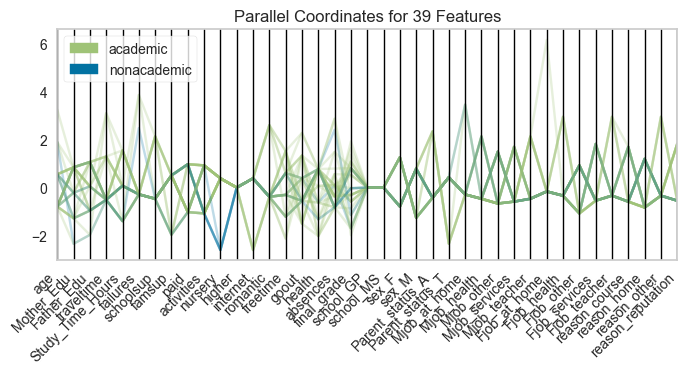

<Axes: title={'center': 'Parallel Coordinates for 39 Features'}>

In [229]:
#All columns
#Import the libaries for Parallel Coordinates Normalised. Assuming `feature_names`, `X`, and `y` are already defined.

from yellowbrick.features import ParallelCoordinates
features = feature_names
classes = ['nonacademic', 'academic']

# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.1, size = (800,300)
)
# Fit and transform the data
visualizer.fit(X, y)     
visualizer.transform(X) 

# Tilt the feature names on the x-axis
plt.xticks(rotation=45, ha="right")  # Rotate the labels 45 degrees, align to the right

# Display the visualization
visualizer.poof()

In [ ]:
# Classifier Evaluation Imports

#from sklearn.linear_model import LogisticRegression 
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split
#from yellowbrick.classifier import ClassificationReport,ConfusionMatrix

In [ ]:
#import matplotlib.pyplot as plt
#from yellowbrick.classifier import ClassificationReport

# Ensure the model is already fitted
#model.fit(X_train, y_train)

# Instantiate the ClassificationReport visualizer
#visualizer = ClassificationReport(model, classes=["Class 0", "Class 1"], support=True)

# Fit the visualizer with training data
#visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
#visualizer.score(X_test, y_test)

# Render the visualization
#visualizer.show()


# Radical Visualization

RadViz (Radial Visualization) is a data visualization technique used to display multivariate data in a 2D space, based on their feature values. Each feature is represented by a point on the perimeter of a circle, and data points are plotted inside the circle based on a weighted average of the feature values

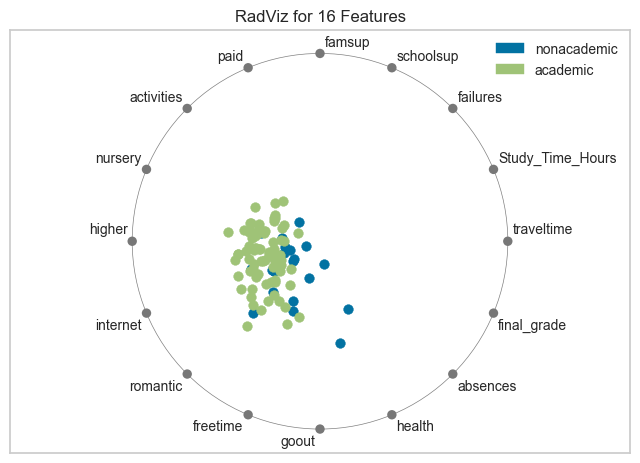

<Axes: title={'center': 'RadViz for 16 Features'}>

In [231]:
from yellowbrick.features import RadViz

# fig, ax = plt.subplots(1, figsize=(12, 6))
# cmap = y_sample.map(lambda v: "steelblue" if v else "lightgray")
vzr = RadViz(classes=['nonacademic', 'academic'])
vzr.fit_transform(X_sample, y_sample)
vzr.poof()

# JointPlotVisualizer

The JointPlotVisualizer plots a feature against the target and shows the distribution of each via a histogram on each axis.

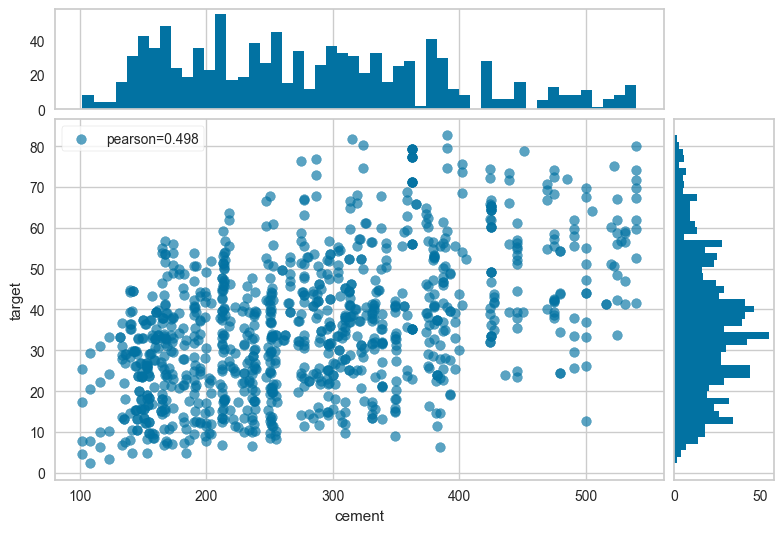

<Axes: xlabel='cement', ylabel='target'>

In [232]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import JointPlotVisualizer

# Load the dataset
X, y = load_concrete()

# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="cement")

visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()                     # Finalize and render the figure

# Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional form while retaining most of the original variance. The goal of PCA is to reduce the number of features (dimensions) in the dataset while preserving as much of the data's variance as possible. 

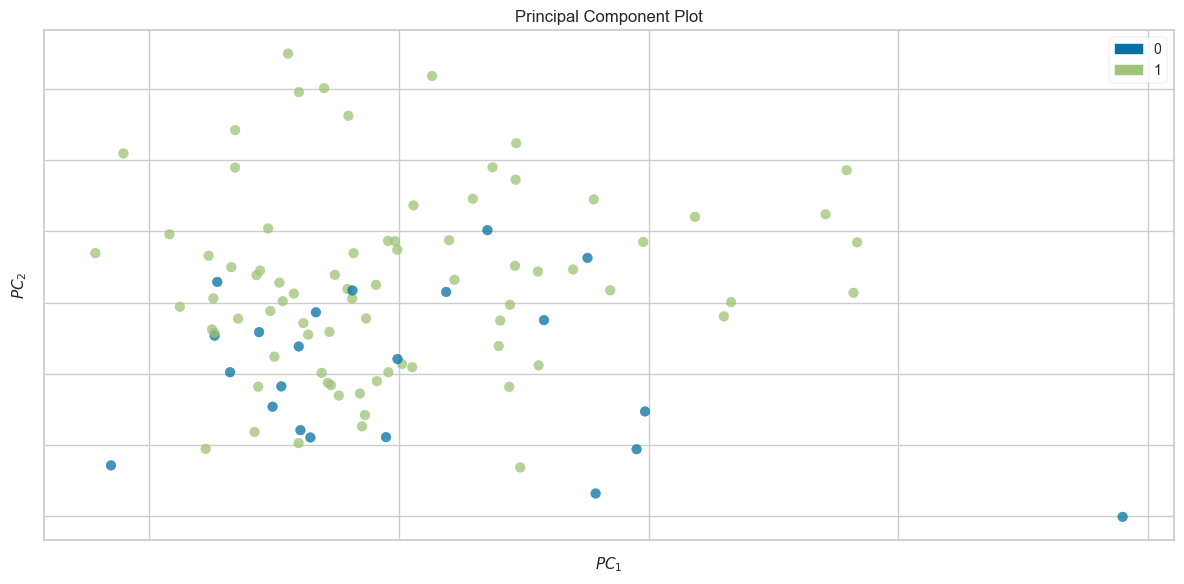

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [233]:
from yellowbrick.features import PCADecomposition

fig, ax = plt.subplots(1, figsize=(12, 6))
cmap = y_sample.map(lambda v: "steelblue" if v else "lightgray")
vzr = PCADecomposition(color=cmap)
vzr.fit_transform(X_sample, y_sample)
vzr.poof()

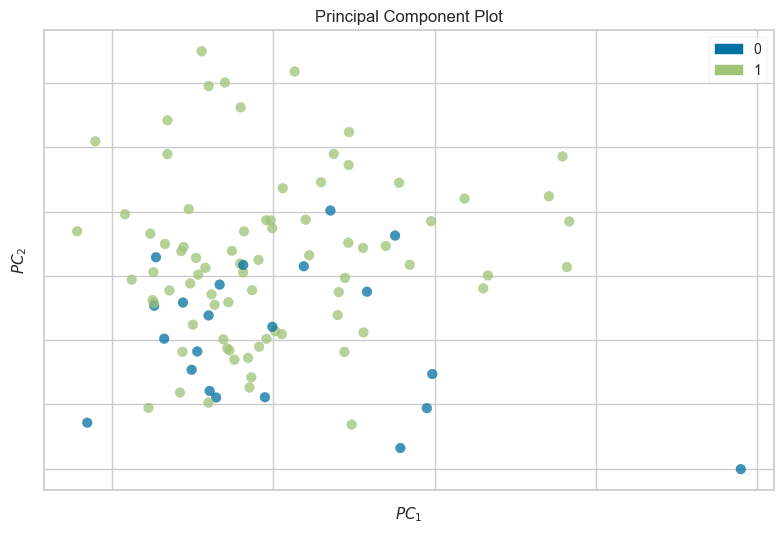

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [234]:
from yellowbrick.features import PCADecomposition
vzr = PCADecomposition(proj_dim=3)
vzr.fit_transform(X_sample, y_sample)
vzr.poof()

# Bonus: Feature Ranking

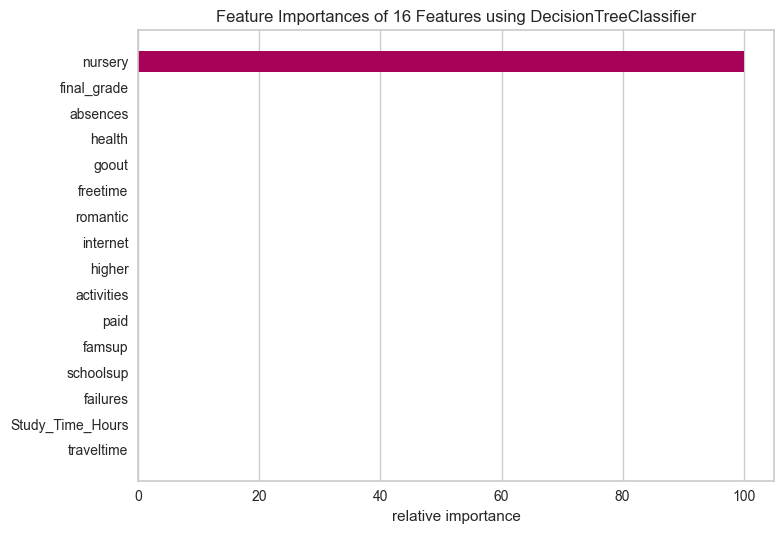

<Axes: title={'center': 'Feature Importances of 16 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [235]:
#Feature importance is focused on the nursery feature. Not the other features.
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.features import FeatureImportances

clf = DecisionTreeClassifier()
viz = FeatureImportances(clf)
viz.fit(X_sample, y_sample)
viz.poof()

# Appendix:

Student Performance Dataset for Python: https://archive.ics.uci.edu/dataset/320/student+performance.Introductory Paper: Using data mining to predict secondary school student performance.By P. Cortez, A. M. G. Silva. 2008
Published in Proceedings of 5th Annual Future Business Technology Conference
Referenced for Machine Learning, Feature and Model Analysis, and Data Visualization. License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.Accessed December 4,2024.

Yellowbrick Library for Machine Learning Model and Data Visualization: https://www.kaggle.com/code/parulpandey/analysing-machine-learning-models-with-yellowbrick
Referenced for the Features Analysis in the Logistic Regression and Decision Tree using model and data visualization. Accessed December 4,2024.

Yellowbrick Library for Machine Learning Model and Data Visualization: https://www.kaggle.com/code/residentmario/ml-visualization-with-yellowbrick-1.
Referenced for the Features Analysis in the Logistic Regression and Decision Tree using model and data visualization. Accessed December 4,2024.

Yellowbrick Library for Machine Learning Model and Data Visualization: https://www.youtube.com/watch?v=XpduzXMhiSA&t=311s.
Referenced for the Features Analysis in the Logistic Regression and Decision Tree using model and data visualization. Accessed December 4,2024.

Yellowbrick Library and Feature Visualization Documentation: https://www.scikit-yb.org/en/latest/.
Referenced for the Features Analysis and Data Analytics. Accessed December 4,2024.

Advanced Feature Engineering for Machine Learning: https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial.
Referenced for the Features Analysis in the Random Forest using model and data visualization. Accessed December 4,2024.

Decision Tree Classification Guide: https://www.kaggle.com/discussions/general/441256.
Referenced for the the Decision Tree Model and Data Analysis. Accessed December 4,2024.

PyCaret Library for Low-Code for Machine Learning: https://www.kaggle.com/code/frtgnn/pycaret-introduction-classification-regression.
Referenced for the the Machine Learning Data Analysis. Accessed December 4,2024.(Bonus).

SHAP Library for Explaining Machine Learning Models in a few lines of code: https://www.kaggle.com/code/dansbecker/shap-values.
Referenced for the the Machine Learning Data Analysis. Accessed December 4,2024.(Bonus).

Machine Learning Libraries: https://www.linkedin.com/groups/25827/?highlightedUpdateUrn=urn%3Ali%3AgroupPost%3A25827-7265931429182631936&q=highlightedFeedForGroups. Referenced for the machine learning libraries and visualizations. Accessed December 4,2024.

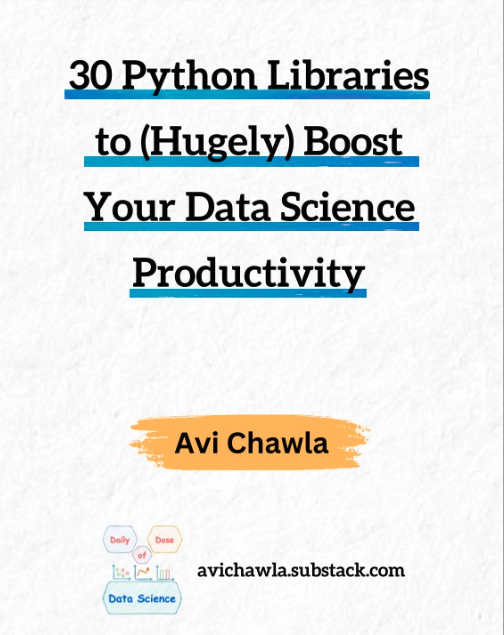
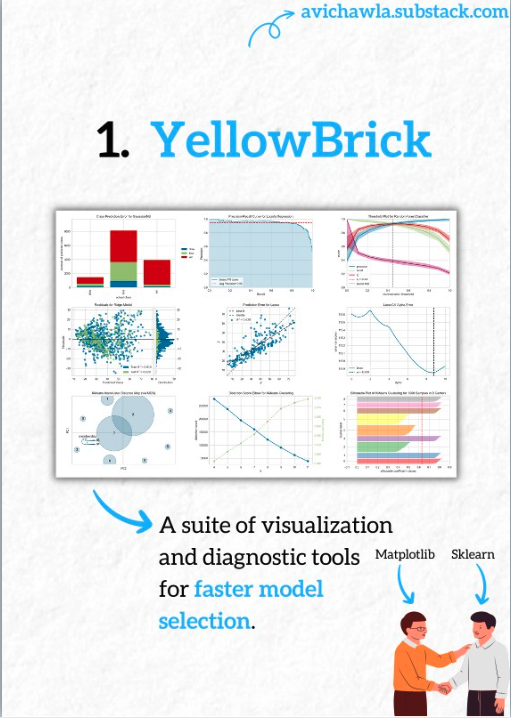